## 08-1 파이썬으로 만들 수 있는 그래프 살펴보기

## 08-2 산점도 - 변수 간 관계 표현하기

### 산점도 만들기

In [1]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

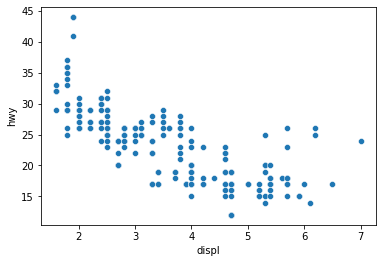

In [2]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

#### 축 범위 설정하기

[(3.0, 6.0)]

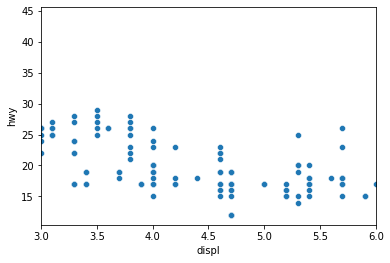

In [3]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = (3, 6))

[(10.0, 30.0), (3.0, 6.0)]

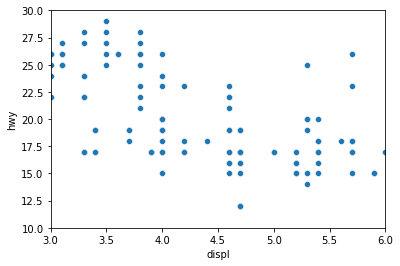

In [4]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = (3, 6), ylim = (10, 30))

#### 종류별로 표식 색깔 바꾸기

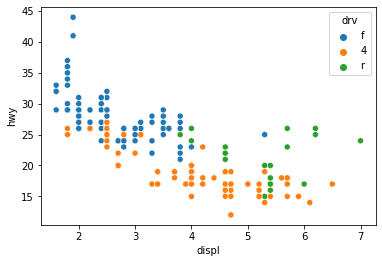

In [5]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

------------------------------------------------------------------------

#### (알아 두면 좋아요) 그래프 활용하기

**그래프 설정 바꾸기**

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '150'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [8, 6]})        # 그림 크기, 기본값 [6, 4]
plt.rcParams.update({'font.size' : '15'})               # 글자 크기, 기본값 10
plt.rcParams.update({'font.family' : 'Malgun Gothic'})  # 폰트, 기본값 sans-serif

In [7]:
plt.rcParams.update({'figure.dpi'     : '150',  
                     'figure.figsize' : [8, 6],
                     'font.size'      : '15',
                     'font.family'    : 'Malgun Gothic'})

**설정 되돌리기**

In [8]:
# 모든 설정 되돌리기
plt.rcParams.update(plt.rcParamsDefault)

**설명 메시지 숨기기**

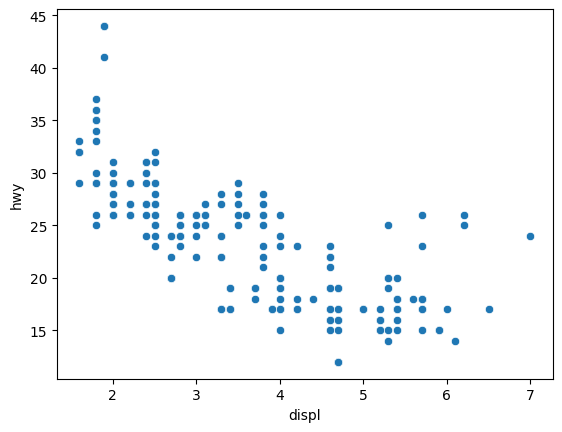

In [9]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy');

## 08-3 막대 그래프 - 집단 간 차이 표현하기

### 평균 막대 그래프 만들기

#### 1. 집단별 평균표 만들기

In [10]:
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [11]:
# drv별 분리
# hwy 평균 구하기

In [12]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


#### 2. 그래프 만들기

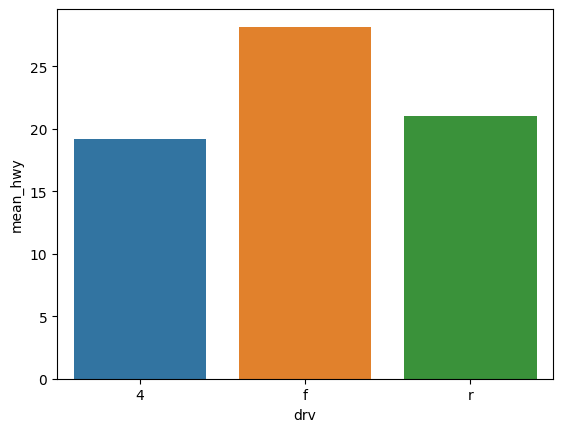

In [13]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

#### 3. 크기순으로 정렬하기

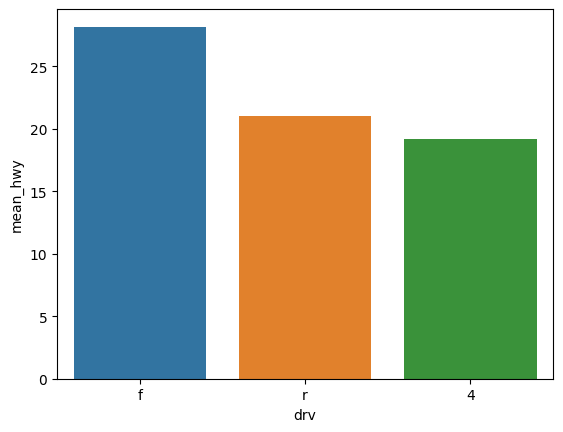

In [14]:
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

### 빈도 막대 그래프 만들기

#### 1. 집단별 빈도표 만들기


In [15]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(n = ('drv', 'count'))

df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


#### 2. 그래프 만들기

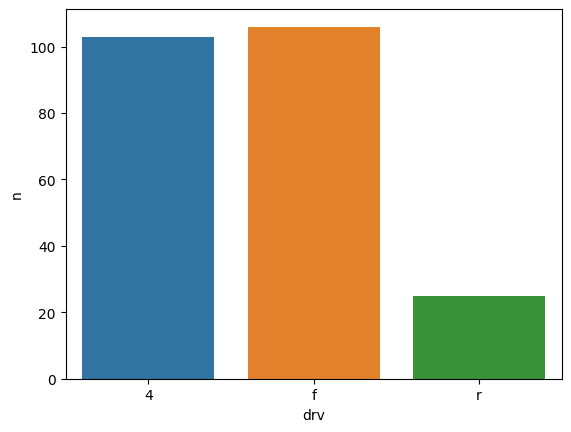

In [16]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

#### sns.countplot()으로 빈도 막대 그래프 만들기

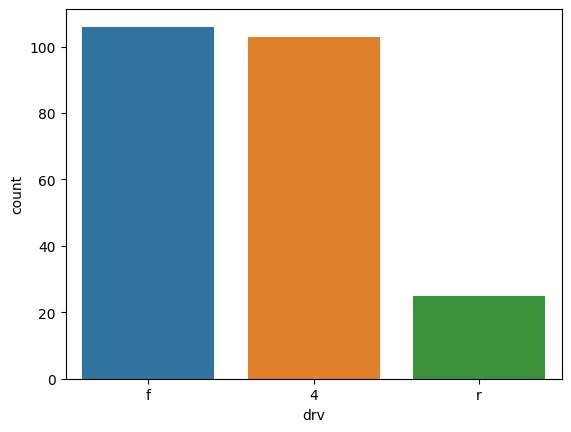

In [17]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

In [18]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [19]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

**막대 정렬하기**

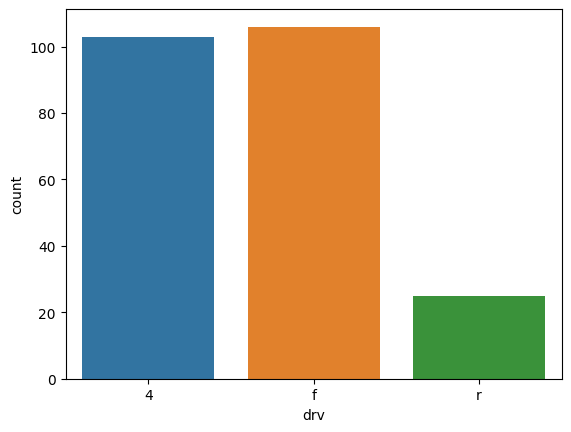

In [20]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [21]:
# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

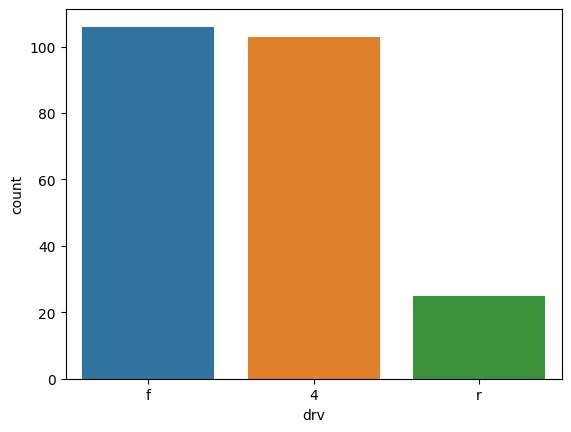

In [22]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

## 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

### 시계열 그래프 만들기

In [23]:
# economics 데이터 불러오기
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


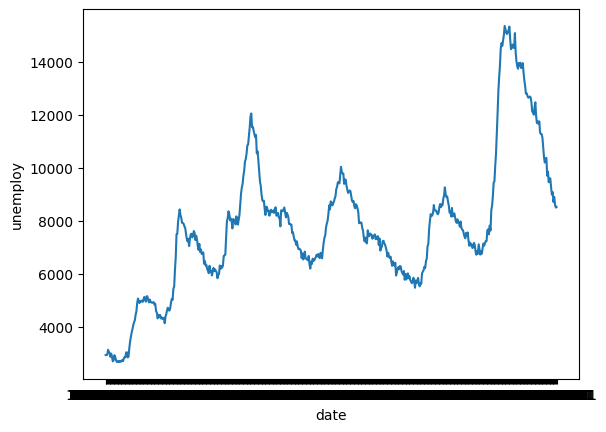

In [24]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

#### x축에 연도 표시하기

**(1) 날짜 시간 타입 변수 만들기**

In [25]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [26]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [27]:
# 연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [28]:
# 월 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [29]:
# 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

**(2) 연도 변수 만들기**

In [30]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


**(3) x축에 연도 표시하기**

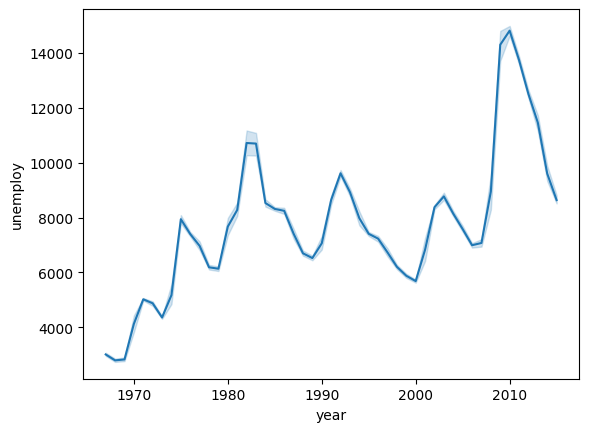

In [31]:
# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

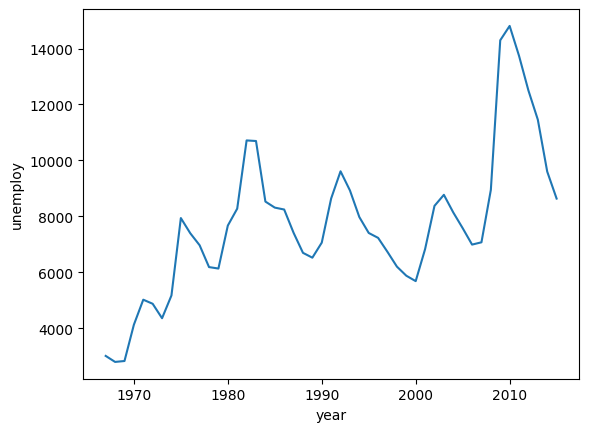

In [32]:
# 신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

## 08-5 상자 그림 - 집단 간 분포 차이 표현하기

### 상자 그림 만들기

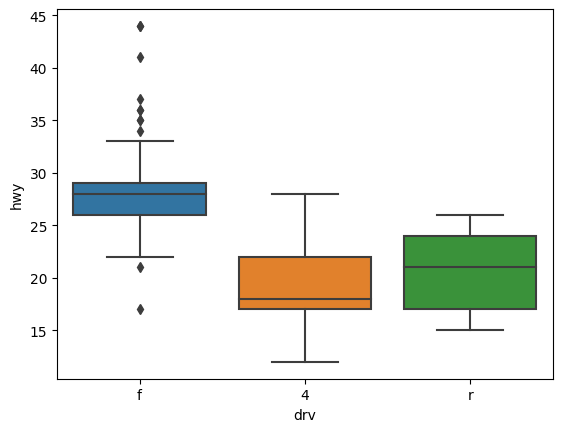

In [33]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

------------------------------------------------------------------------

#### 정리하기

| 함수              | 그래프                    |
|-------------------|---------------------------|
| sns.scatterplot() | 산점도                    |
| sns.barplot()     | 막대 그래프 - 요약표 활용 |
| sns.countplot()   | 막대 그래프 - 원자료 활용 |
| sns.lineplot()    | 선 그래프                 |
| sns.boxplot()     | 상자 그림                 |